# Desafio Técnico - Cientista de Dados Júnior

  ## Utilizando Python e pandas para resolver todas as questões do desafio.
- Thiago Costa Sá

In [2]:
! pip install basedosdados

### Carregando dados: Chamados do 1746

In [3]:
import basedosdados as bd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

query_chamado = "SELECT * FROM `datario.administracao_servicos_publicos.chamado_1746` WHERE data_inicio BETWEEN '2023-04-01 00:00:00' AND '2023-04-01 23:59:59'"
df_chamado1746 = bd.read_sql(query_chamado, billing_project_id="emd-projeto")

Downloading: 100%|██████████| 73/73 [00:00<00:00, 315.99rows/s]


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_chamado1746.head(3)

,id_chamado,data_inicio,data_fim,id_bairro,id_territorialidade,id_logradouro,numero_logradouro,id_unidade_organizacional,nome_unidade_organizacional,id_unidade_organizacional_mae,unidade_organizacional_ouvidoria,categoria,id_tipo,tipo,id_subtipo,subtipo,status,longitude,latitude,data_alvo_finalizacao,data_alvo_diagnostico,data_real_diagnostico,tempo_prazo,prazo_unidade,prazo_tipo,dentro_prazo,situacao,tipo_situacao,justificativa_status,reclamacoes,data_particao,geometry
0,18516246,2023-04-01 00:55:38,2023-04-01 00:55:38,None,None,None,<NA>,1706,TR/SUBOP/CFT - Coordenadoria de Fiscalização e...,SMTR - Secretaria Municipal de Transportes,False,Serviço,93,Ônibus,1242,Verificação de ar condicionado inoperante no ô...,Fechado com informação,NaN,NaN,2023-04-11 00:55:00,NaT,NaT,<NA>,D,F,No prazo,Encerrado,Atendido parcialmente,None,0,2023-04-01,None
1,18516254,2023-04-01 01:08:04,2023-04-01 01:43:38,1,1,62364,60,70,GM-RIO - Guarda Municipal do Rio de Janeiro,GM-RIO - Guarda Municipal do Rio de Janeiro,False,Serviço,782,Estacionamento Irregular,2966,Fiscalização de estacionamento irregular de ve...,Não constatado,NaN,NaN,2023-04-01 03:08:00,NaT,NaT,<NA>,H,F,No prazo,Encerrado,Não constatado,None,0,2023-04-01,None
2,18516194,2023-04-01 00:04:59,NaT,14,1,76992,120,1240,CCU - 1º Serviço de Fiscalização,CCU - Coordenadoria de Controle Urbano,False,Serviço,243,Comércio ambulante,1101,Fiscalização de comércio ambulante,Aberto,-43.186679,-22.921335,2023-05-01 00:04:00,NaT,NaT,<NA>,D,F,Fora do prazo,Não Encerrado,Andamento,None,0,2023-04-01,POINT(-43.186679 -22.921335)


In [6]:
df_chamado1746.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id_chamado                        73 non-null     object        
 1   data_inicio                       73 non-null     datetime64[ns]
 2   data_fim                          9 non-null      datetime64[ns]
 3   id_bairro                         72 non-null     object        
 4   id_territorialidade               72 non-null     object        
 5   id_logradouro                     72 non-null     object        
 6   numero_logradouro                 70 non-null     Int64         
 7   id_unidade_organizacional         73 non-null     object        
 8   nome_unidade_organizacional       73 non-null     object        
 9   id_unidade_organizacional_mae     73 non-null     object        
 10  unidade_organizacional_ouvidoria  73 non-null     ob

### Carregando dados: Bairros do Rio de Janeiro

In [7]:
query_bairro = "SELECT * FROM `datario.dados_mestres.bairro`"
df_bairro = bd.read_sql(query_bairro, billing_project_id="emd-projeto")

Downloading: 100%|██████████| 164/164 [00:03<00:00, 48.11rows/s]


In [8]:
df_bairro.sample(3)

,id_bairro,nome,id_area_planejamento,id_regiao_planejamento,nome_regiao_planejamento,id_regiao_administrativa,nome_regiao_administrativa,subprefeitura,area,perimetro,geometry_wkt,geometry
66,72,Vila Kosmos,3,3.3,Madureira,14,Iraja,Zona Norte,1.519254e+06,6511.866620,POLYGON ((-43.2935757659336 -22.85493387969146...,"POLYGON((-43.2935757659336 -22.8549338796915, ..."
149,135,Vila Militar,5,5.1,Bangu,33,Realengo,Grande Bangu,1.075671e+07,18077.023094,POLYGON ((-43.41107678938774 -22.8407005871518...,"POLYGON((-43.4110767893877 -22.8407005871518, ..."
140,162,Vila Kennedy,5,5.1,Bangu,17,Bangu,Grande Bangu,1.473737e+06,6789.609579,POLYGON ((-43.48754104860259 -22.8623414911698...,"POLYGON((-43.4875410486026 -22.8623414911698, ..."


In [9]:
df_bairro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_bairro                   164 non-null    object 
 1   nome                        164 non-null    object 
 2   id_area_planejamento        164 non-null    object 
 3   id_regiao_planejamento      164 non-null    object 
 4   nome_regiao_planejamento    164 non-null    object 
 5   id_regiao_administrativa    164 non-null    object 
 6   nome_regiao_administrativa  164 non-null    object 
 7   subprefeitura               164 non-null    object 
 8   area                        164 non-null    float64
 9   perimetro                   164 non-null    float64
 10  geometry_wkt                164 non-null    object 
 11  geometry                    164 non-null    object 
dtypes: float64(2), object(10)
memory usage: 15.5+ KB


### Carregando dados: Ocupação Hoteleira em Grandes Eventos no Rio

In [10]:
query_ocupacao = "SELECT * FROM `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos`"
df_ocupacao = bd.read_sql(query_ocupacao, billing_project_id="emd-projeto")

Downloading: 100%|██████████| 4/4 [00:00<00:00, 16.36rows/s]


In [11]:
df_ocupacao.head()

,ano,data_inicial,data_final,evento,taxa_ocupacao
0,18/02 a 21/02 de 2023,2023-02-18,2023-02-21,Carnaval,0.9554
1,30-31/12 e 01/01 (2022-2023),2022-12-30,2023-01-01,Reveillon,0.9251
2,02/09 a 04/09 de 2022,2022-09-02,2022-09-04,Rock in Rio,0.8184
3,08/09 a 11/09 de 2022,2022-09-08,2022-09-11,Rock in Rio,0.9451


In [12]:
df_ocupacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ano            4 non-null      object 
 1   data_inicial   4 non-null      dbdate 
 2   data_final     4 non-null      dbdate 
 3   evento         4 non-null      object 
 4   taxa_ocupacao  4 non-null      float64
dtypes: dbdate(2), float64(1), object(2)
memory usage: 288.0+ bytes


## Localização de chamados do 1746

### 1 - Quantos chamados foram abertos no dia 01/04/2023?

In [13]:
quest1 = df_chamado1746['data_inicio'].count()
print(f"No dia 01/04/2023 foram abertos {quest1} chamados")

No dia 01/04/2023 foram abertos 73 chamados


### 2 - Qual o tipo de chamado que teve mais teve chamados abertos no dia 01/04/2023?

In [14]:
df_chamado1746['tipo'].value_counts()

Poluição sonora             24
Estacionamento Irregular     9
Iluminação Pública           8
Remoção Gratuita             5
Limpeza                      5
Postura Municipal            4
Ocupação de área pública     3
Pavimentação                 3
Comlurb - Vetores            2
Fiscalização de obras        2
Manejo Arbóreo               2
Programa Cegonha Carioca     1
Ônibus                       1
Drenagem e Saneamento        1
Feiras                       1
Comércio ambulante           1
Semáforo                     1
Name: tipo, dtype: int64

In [15]:
print(f"O tipo de chamado que mais teve chamados abertos foi: {df_chamado1746['tipo'].value_counts().idxmax()}.")

O tipo de chamado que mais teve chamados abertos foi: Poluição sonora.


### 3 - Quais os nomes dos 3 bairros que mais tiveram chamados abertos nesse dia?

In [16]:
df_join = pd.merge(df_chamado1746, df_bairro, on="id_bairro", how='left')

In [17]:
df_join['nome'].value_counts()

Engenho de Dentro         8
Leblon                    6
Campo Grande              6
Barra da Tijuca           5
Engenho da Rainha         5
Tijuca                    3
Santa Teresa              3
Paciência                 2
Vila da Penha             2
Lapa                      2
Jacarepaguá               2
Bangu                     2
Ipanema                   2
Irajá                     2
Taquara                   1
Itanhangá                 1
Tanque                    1
Pechincha                 1
Guaratiba                 1
Realengo                  1
Senador Vasconcelos       1
Encantado                 1
Saúde                     1
Olaria                    1
Vista Alegre              1
Penha                     1
Cascadura                 1
Guadalupe                 1
Cavalcanti                1
Vila Isabel               1
Botafogo                  1
Catete                    1
Laranjeiras               1
Flamengo                  1
Centro                    1
Ricardo de Albuquerq

In [18]:
print(f"Os 3 bairros com mais chamadas foram:\n{df_join['nome'].value_counts().head(3)}.")

Os 3 bairros com mais chamadas foram:
Engenho de Dentro    8
Leblon               6
Campo Grande         6
Name: nome, dtype: int64.


### 4 - Qual o nome da subprefeitura com mais chamados abertos nesse dia?

In [19]:
df_join['subprefeitura'].value_counts()

Zona Norte         25
Zona Sul           12
Zona Oeste         10
Centro              7
Barra da Tijuca     6
Jacarepaguá         5
Grande Tijuca       4
Grande Bangu        3
Name: subprefeitura, dtype: int64

In [20]:
print(f"A subprefeitura com mais chamado foi: {df_join['subprefeitura'].value_counts().idxmax()}.")

A subprefeitura com mais chamado foi: Zona Norte.


### 5 - Existe algum chamado aberto nesse dia que não foi associado a um bairro ou subprefeitura na tabela de bairros? Se sim, por que isso acontece?

In [21]:
df_join[df_join['id_bairro'].isnull() | df_join['subprefeitura'].isnull()]

,id_chamado,data_inicio,data_fim,id_bairro,id_territorialidade,id_logradouro,numero_logradouro,id_unidade_organizacional,nome_unidade_organizacional,id_unidade_organizacional_mae,unidade_organizacional_ouvidoria,categoria,id_tipo,tipo,id_subtipo,subtipo,status,longitude,latitude,data_alvo_finalizacao,data_alvo_diagnostico,data_real_diagnostico,tempo_prazo,prazo_unidade,prazo_tipo,dentro_prazo,situacao,tipo_situacao,justificativa_status,reclamacoes,data_particao,geometry_x,nome,id_area_planejamento,id_regiao_planejamento,nome_regiao_planejamento,id_regiao_administrativa,nome_regiao_administrativa,subprefeitura,area,perimetro,geometry_wkt,geometry_y
0,18516246,2023-04-01 00:55:38,2023-04-01 00:55:38,None,None,None,<NA>,1706,TR/SUBOP/CFT - Coordenadoria de Fiscalização e...,SMTR - Secretaria Municipal de Transportes,False,Serviço,93,Ônibus,1242,Verificação de ar condicionado inoperante no ô...,Fechado com informação,NaN,NaN,2023-04-11 00:55:00,NaT,NaT,<NA>,D,F,No prazo,Encerrado,Atendido parcialmente,None,0,2023-04-01,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Teve um chamado aberto que não está associado a um bairro ou subprefeitura por motivos que o chamado foi aberto para uma verificação do ar condicionado de um onibus.

## Chamados do 1746 em grandes eventos

### 6 - Quantos chamados com o subtipo "Perturbação do sossego" foram abertos desde 01/01/2022 até 31/12/2023 (incluindo extremidades)?

In [22]:
query_pertubacao = "SELECT * FROM `datario.administracao_servicos_publicos.chamado_1746` WHERE data_inicio BETWEEN '2022-01-01 00:00:00' AND '2023-12-31 23:59:59' AND subtipo = 'Perturbação do sossego'"
df_pertubacao = bd.read_sql(query_pertubacao, billing_project_id="emd-projeto")

Downloading: 100%|██████████| 42408/42408 [00:13<00:00, 3032.01rows/s]


In [23]:
df_pertubacao['subtipo'].unique() # Podemos ver que o subtipo só tem um valor unico que definimos como "Pertubação do sossego" na query_pertubação

array(['Perturbação do sossego'], dtype=object)

In [24]:
print(f"Foram abertos {df_pertubacao['data_inicio'].count()} chamados desde 01/01/2022 até 31/12/2023")

Foram abertos 42408 chamados desde 01/01/2022 até 31/12/2023


### 7 - Selecione os chamados com esse subtipo que foram abertos durante os eventos contidos na tabela de eventos (Reveillon, Carnaval e Rock in Rio).

In [25]:
for index_pertubacao, row_pertubacao in df_pertubacao.iterrows():
    for index_ocupacao, row_ocupacao in df_ocupacao.iterrows():
        if row_ocupacao['data_inicial'] <= row_pertubacao['data_inicio'] <= row_ocupacao['data_final']:
            df_pertubacao.at[index_pertubacao, 'evento'] = row_ocupacao['evento']

In [26]:
eventos_pertubacao = df_pertubacao.loc[df_pertubacao['evento'].notnull()]

In [27]:
eventos_pertubacao['evento'].unique()

array(['Rock in Rio', 'Carnaval', 'Reveillon'], dtype=object)

### 8 - Quantos chamados desse subtipo foram abertos em cada evento?

In [28]:
eventos_pertubacao['evento'].value_counts()

Rock in Rio    834
Carnaval       241
Reveillon      137
Name: evento, dtype: int64

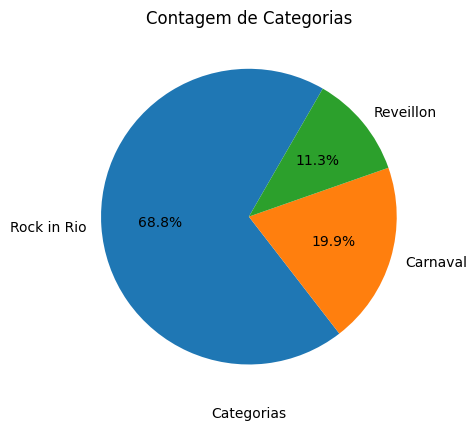

In [29]:
plt.pie(eventos_pertubacao['evento'].value_counts(), labels = eventos_pertubacao['evento'].value_counts().index, autopct='%1.1f%%', startangle=60)
plt.xlabel('Categorias')
plt.title('Contagem de Categorias')
plt.show()

### 9 - Qual evento teve a maior média diária de chamados abertos desse subtipo?

In [30]:
eventos_pertubacao['data_inicio'] = eventos_pertubacao['data_inicio'].dt.date

In [31]:
size_eventos = eventos_pertubacao.groupby(['data_inicio', 'evento']).size().reset_index(name='ContagemEventos')
size_eventos

,data_inicio,evento,ContagemEventos
0,2022-09-02,Rock in Rio,100
1,2022-09-03,Rock in Rio,112
2,2022-09-04,Rock in Rio,154
3,2022-09-08,Rock in Rio,77
4,2022-09-09,Rock in Rio,114
5,2022-09-10,Rock in Rio,115
6,2022-09-11,Rock in Rio,162
7,2022-12-30,Reveillon,42
8,2022-12-31,Reveillon,37
9,2023-01-01,Reveillon,58


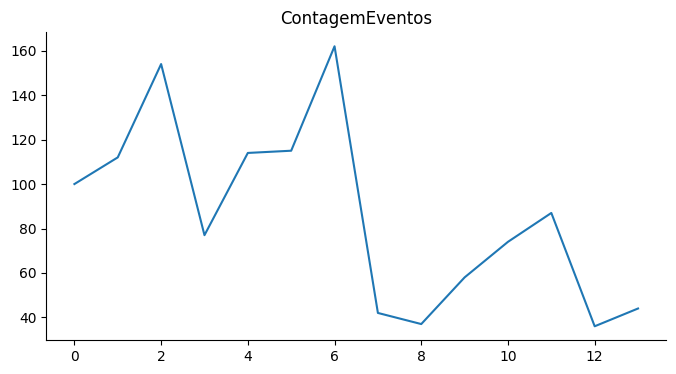

In [39]:
size_eventos['ContagemEventos'].plot(kind='line', figsize=(8, 4), title='ContagemEventos')
plt.gca().spines[['top', 'right']].set_visible(False)

In [33]:
media_eventos = size_eventos.groupby('evento')['ContagemEventos'].mean().reset_index(name='Média')
media_eventos

,evento,Média
0,Carnaval,60.250000
1,Reveillon,45.666667
2,Rock in Rio,119.142857


In [34]:
print(f"Evento com maior média diária de chamados: {media_eventos['evento'].loc[media_eventos['Média'].idxmax()]}")

Evento com maior média diária de chamados: Rock in Rio


### 10 - Compare as médias diárias de chamados abertos desse subtipo durante os eventos específicos (Reveillon, Carnaval e Rock in Rio) e a média diária de chamados abertos desse subtipo considerando todo o período de 01/01/2022 até 31/12/2023.

In [35]:
media_eventos

,evento,Média
0,Carnaval,60.250000
1,Reveillon,45.666667
2,Rock in Rio,119.142857


In [36]:
df_pertubacao['data_inicio'] = df_pertubacao['data_inicio'].dt.date
media_periodo = df_pertubacao.groupby(['data_inicio', 'subtipo']).size().reset_index(name='Contagem')

In [37]:
media_total = media_periodo['Contagem'].mean()
media_total

63.20119225037258

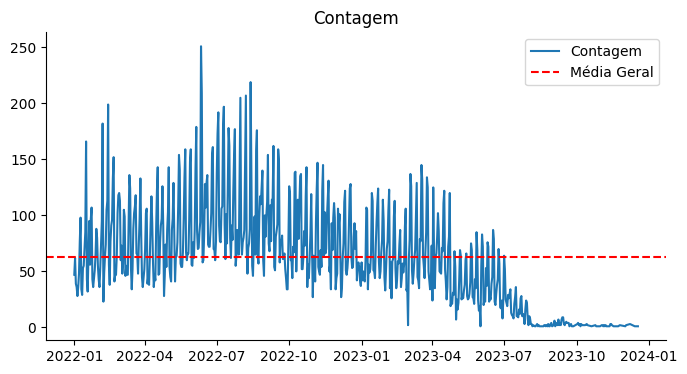

In [38]:
plt.figure(figsize=(8, 4))
plt.plot(media_periodo['data_inicio'], media_periodo['Contagem'], label='Contagem')
plt.axhline(y=media_total, color='r', linestyle='--', label='Média Geral')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()
plt.title('Contagem')
plt.show()

A média diária de chamados do período 01/01/2022 até 31/12/2023 é de 63.2 chamados. Enquanto a média diária de chamados durante eventos foi,
Carnaval = 60.2,
Reveillon	= 45.6,
Rock in Rio	= 119.14